<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

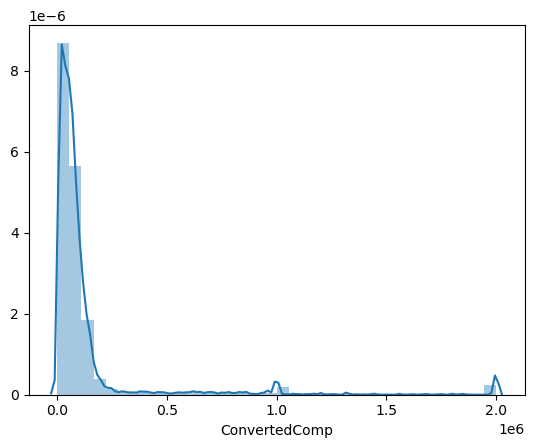

In [4]:
# your code goes here
sns.distplot (
    df ['ConvertedComp'], 
    hist = True, 
    kde = True, 
    bins = int(180/5)
)

Plot the histogram for the column `ConvertedComp`.


What is the median of the column `ConvertedComp`?


In [5]:
df['Age'].median()

29.0

In [6]:
df['ConvertedComp'].median()

57745.0

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

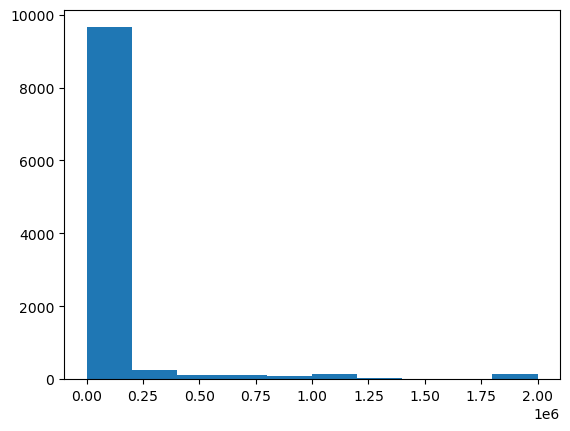

In [7]:
# your code goes here
plt.hist (
    df['ConvertedComp'],
    bins=10
)

In [8]:
# your code goes here
print(
    "The median of ConvertedComp is: ",
    df['ConvertedComp'].median()
)

The median of ConvertedComp is:  57745.0


How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
print (
    "Number of Respondents that identify themselve only as a Man:",
    df['Gender'].value_counts()['Man']
)

Number of Respondents that identify themselve only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here

print (
    "The median of responders that identify themselves only as a Woman are: ",
    df['ConvertedComp'][(df.Gender == 'Woman')].median()
)

The median of responders that identify themselves only as a Woman are:  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
df.describe()['Age']

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


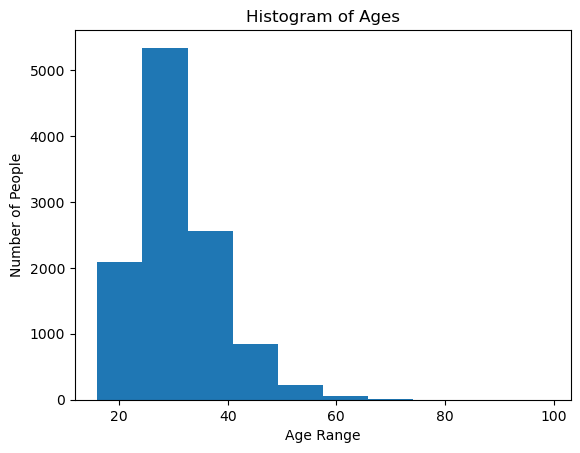

In [12]:
# your code goes here
import numpy as np

df['Age'].plot(kind='hist')

plt.title("Histogram of Ages")

plt.ylabel("Number of People")

plt.xlabel("Age Range")

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


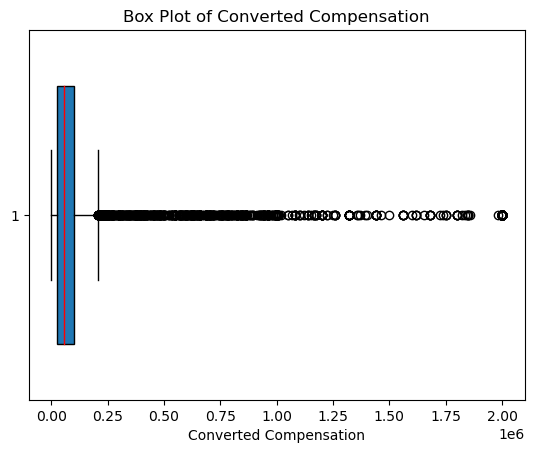

In [36]:
# your code goes here
df = df.dropna(subset=['ConvertedComp'])
# Create a box plot for the 'ConvertedComp' column
plt.boxplot(df['ConvertedComp'], vert=False, widths=0.7, patch_artist=True, medianprops={'color': 'red'})

# Label the x-axis
plt.xlabel('Converted Compensation')

# Add a title
plt.title('Box Plot of Converted Compensation')

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [37]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
Q1,Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile Range for ConvertedComp:', IQR)


The Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [38]:
# your code goes here
# Calculate the IQR (Interquartile Range)
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)


Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [41]:
# your code goes here
df1=df[(df['ConvertedComp'] > upper) | (df ['ConvertedComp'] < lower)]
df1.shape

(879, 85)

After removing outlier median

In [31]:
df1['ConvertedComp'].median() 

52704.0

In [32]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper, lower)
df2.describe()


count     10582.000000
mean      72327.661406
std       58619.926538
min           0.000000
25%       26868.000000
50%       57745.000000
75%      100000.000000
max      209698.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:

# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
